<center><h1> <u>Haberman's Survival Dataset Analysis</u> </h1></center>

<h3> Some information about the dataset</h3>

There are 4 attributes and there is no missing attributes value

<p>1. Age - Age of patient at time of operation (numerical)<br>
2. Year - Patient's year of operation (year - 1900, numerical)<br>
3. Nodes - Number of positive axillary nodes detected (numerical)<br>
4. Status - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
</p>

<h3><u>Objective</u> - To classify the pateints into two categories-</h3>  <br>1. Who lived 5 or more than 5 years<br> 2. Who lived less than 5 years after the surgery

In [1]:
# import all the needed python libraries
import pandas
import seaborn
import matplotlib.pyplot as matplot
import numpy

# reading the csv dataset file and assigning it to a variable
dataset = pandas.read_csv("haberman.csv")

In [13]:
# number of data-points and features present in the dataset?
datapoints = dataset.shape

print(datapoints)

(306, 4)


In [14]:
# column names in our dataset
columns = dataset.columns
print(columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [18]:
# data points for each class that are present in our dataset? 
'''Here there are only two classes - 1 for patient surviving for 5 or more than 5 years 
and 2 for patient surving less than 5 years'''
# this basically categorizes the dataset into 2 categories

dataset["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

 <b>Observation 1</b><br> 
1. There are 2 categories in which we have to classify the dataset<br>
2. It is not a balanced dataset

# 2d scatter Plot


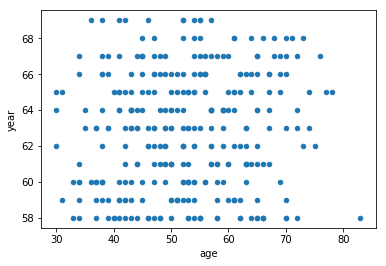

In [20]:
dataset.plot(kind="scatter", x="age", y="year")
matplot.show()

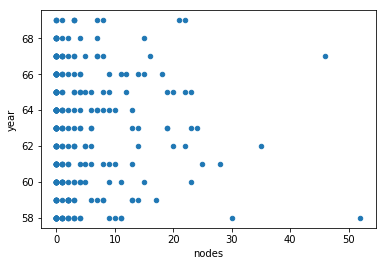

In [22]:
dataset.plot(kind="scatter", x="nodes", y="year")
matplot.show()

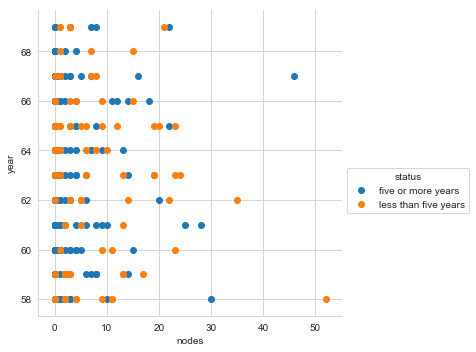

In [25]:
seaborn.set_style("whitegrid")
seaborn.FacetGrid(dataset, hue="status", height=5).map(matplot.scatter, "nodes","year")
matplot.legend(title="status",labels=["five or more years","less than five years"],bbox_to_anchor=(1, 0.5) )
matplot.show()


<b>Observation 2</b><br>
1. People with more than 50 positive nodes won't survive for more than 5 years<br>
2. Majority of the people have positive nodes between 0 to 10<br>
3. People who have less than 10 postive nodes have higher chances of surviving for more than 5 years

# Pair Plots

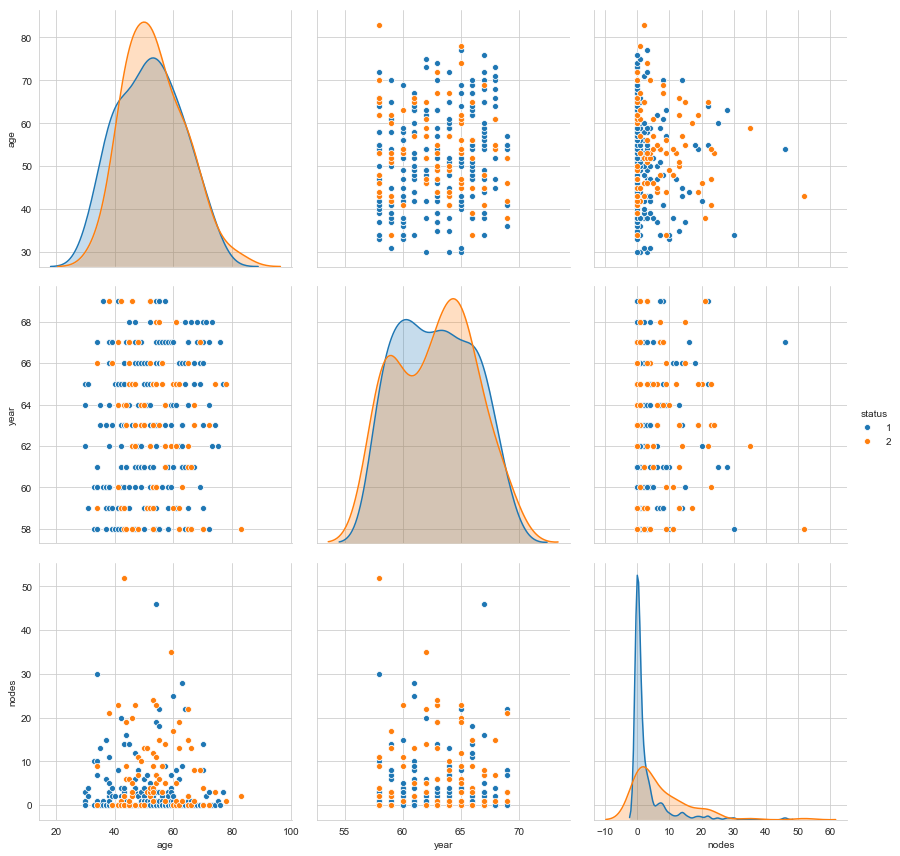

In [15]:
matplot.close()
seaborn.set_style("whitegrid")
seaborn.pairplot(dataset, vars=["age","year","nodes"],hue="status", height=4)
matplot.show()

<b>Observation 3</b><br>
1. Nothing is clear from pairplots. These are overlapping a lot.

# Histograms

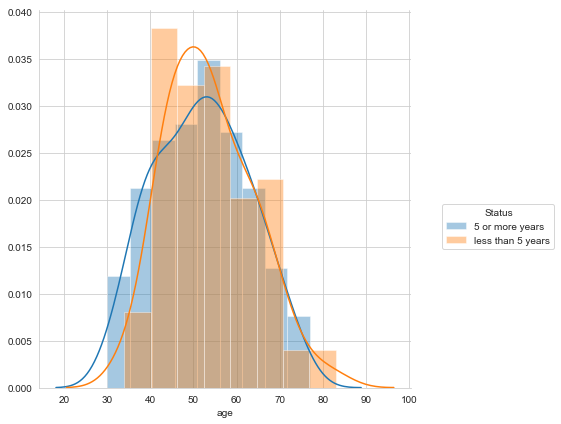

In [13]:
matplot.close()
seaborn.FacetGrid(dataset, hue="status", height=6).map(seaborn.distplot, "age")
matplot.legend(title="Status", labels=["5 or more years", "less than 5 years"],bbox_to_anchor=(1.4,0.5))
matplot.show()

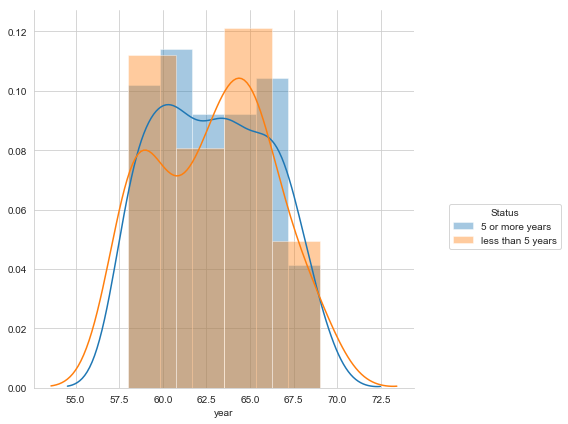

In [16]:
matplot.close()
seaborn.FacetGrid(dataset, hue="status", height=6).map(seaborn.distplot, "year")
matplot.legend(title="Status", labels=["5 or more years", "less than 5 years"],bbox_to_anchor=(1.4,0.5))
matplot.show()

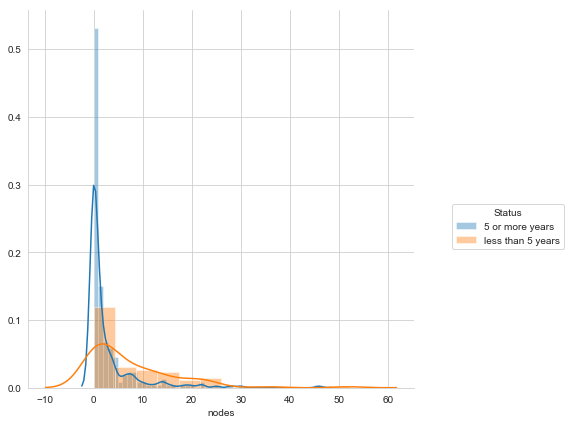

In [15]:
matplot.close()
seaborn.FacetGrid(dataset, hue="status", height=6).map(seaborn.distplot, "nodes")
matplot.legend(title="Status", labels=["5 or more years", "less than 5 years"],bbox_to_anchor=(1.4,0.5))
matplot.show()

<b>Observation 4</b><br>
1. Age and year are not good attributes to classify the dataset as they are overlapping a lot.<br>
2. Nodes is the only attribute that is good enough.

<h2>PDF and CDF</h2>

In [3]:
dataset_more = dataset.loc[dataset["status"] == 1];
dataset_less = dataset.loc[dataset["status"] == 2];



[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


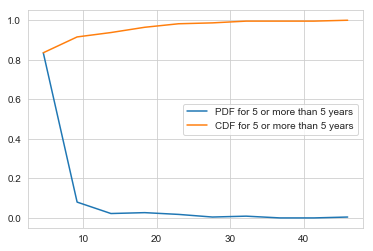

In [17]:
#PDF and CDF of people who live 5 or more than 5 years after surgery on basis of number of positive nodes

counts, bin_edges = numpy.histogram(dataset_more['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = numpy.cumsum(pdf)
matplot.plot(bin_edges[1:],pdf);
matplot.plot(bin_edges[1:], cdf)
matplot.legend(labels=["PDF for 5 or more than 5 years","CDF for 5 or more than 5 years"])
matplot.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


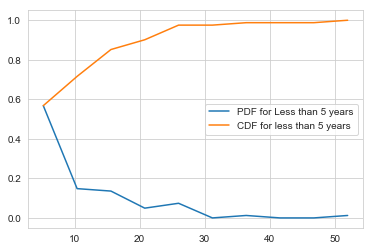

In [18]:
#PDF and CDF of people who live less than 5 years after surgery on basis of number of positive nodes

counts, bin_edges = numpy.histogram(dataset_less['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = numpy.cumsum(pdf)
matplot.plot(bin_edges[1:],pdf);
matplot.plot(bin_edges[1:], cdf)
matplot.legend(labels=["PDF for Less than 5 years","CDF for less than 5 years"])
matplot.show()

<b>Obseravation 5</b><br>
1. People who have more than 47 positive nodes won't survive for 5 or more years

# Mean, Variance and Std-dev

In [50]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(numpy.mean(dataset_more["nodes"]))
print(numpy.mean(dataset_less["nodes"]))


print("\nStd-dev:");
print(numpy.std(dataset_more["nodes"]))
print(numpy.std(dataset_less["nodes"]))

Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


<b>Observation 6</b><br>
1. Mean of positive nodes for people who live 5 or more years is less than that of people who live less than 5 years.

In [52]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(numpy.median(dataset_more["nodes"]))
print(numpy.median(dataset_less["nodes"]))

print("\nQuantiles:")
print(numpy.percentile(dataset_more["nodes"],numpy.arange(0, 100, 25)))
print(numpy.percentile(dataset_less["nodes"],numpy.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(numpy.percentile(dataset_more["nodes"],90))
print(numpy.percentile(dataset_less["nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(dataset_more["nodes"]))
print(robust.mad(dataset_less["nodes"]))



Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


<b>Observation 7</b><br>
1. From 90th percentile value , we can see that 90% of people who live 5 or more years have 8 or less positive nodes.


# Box plot and Whiskers

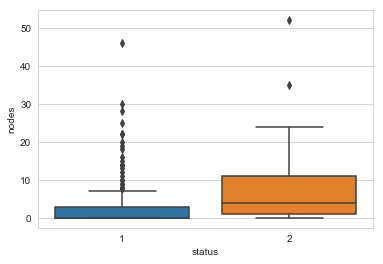

In [53]:
seaborn.boxplot(x='status',y='nodes', data=dataset)
matplot.show()

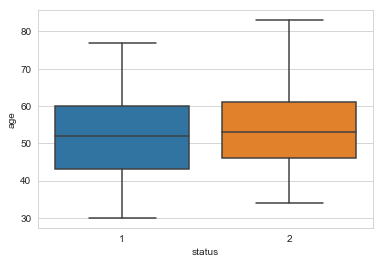

In [19]:
seaborn.boxplot(x='status',y='age', data=dataset)
matplot.show()

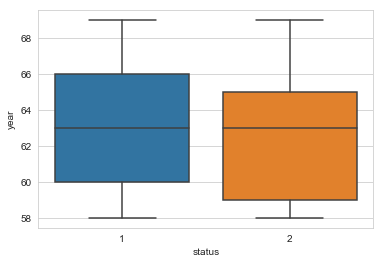

In [20]:
seaborn.boxplot(x='status',y='year', data=dataset)
matplot.show()

<b>Observation 8</b><br>
1. People older than 78 years at the time of surgery didn't survive more than 5 years.<br>
2. Around 75% of people who didn't survive for more than 5 years had more than 10 positive nodes.<br>
3. 75% of people who were operated in 1965 didn't survive for more than 5 years.

# Violin plots

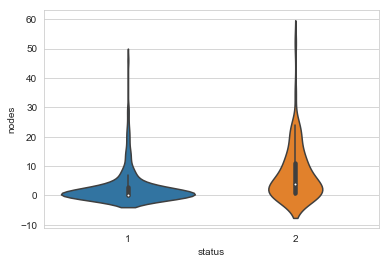

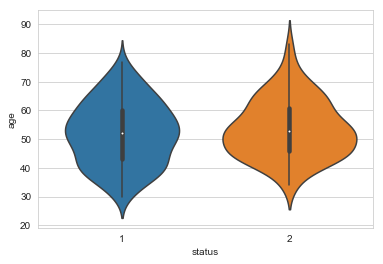

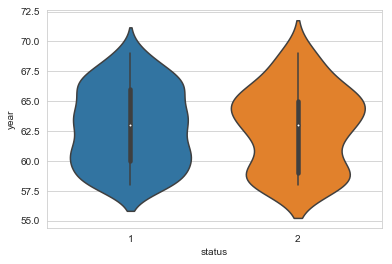

In [22]:
seaborn.violinplot(x='status',y='nodes', data=dataset)
matplot.show()
seaborn.violinplot(x='status',y='age', data=dataset)
matplot.show()
seaborn.violinplot(x='status',y='year', data=dataset)
matplot.show()

<b>Observations 9</b><br>
1. majority of the poeple who lived more than 5 years had less than 10 positive nodes.<br>
2. Most of the people who got operated in the year between 1958-1961 and had an age of 50-60, survived more than 5 years.<br>
3. Most of the people who got operated in the year between 1963-1966 and had an age of 44-52, didn't survive more than 5 years.

<br><b><u>Final Conclusion</u><br>
1. There are 2 categories in which we have to classify the dataset i.e. people who survived less than 5 years and who survived 5 or more years. And after taking a look at the datapoinst we came to know that it is not a balanced dataset.<br>
2. Age and year of operation were not vey helpful, only the number of nodes are good enough to classify.<br>
3. People with more than 47 positive nodes didn't survive for more than 5 years. And majority of the people have positive nodes between 0 to 10 so majority of the people survived for more than 5 years.<br>
4. People didn't survive for more than 5 years if their age at the time of surgery was more than 77.</b>